# Assignment 1 for FIT5212, Semester 1, 2020

**Student Name:**  Keerthana Muralitharan

**Student ID:**    30159474

## Part 1:  Text Classification

Text Classification is to be done on the content gathered from the popular academic website arXiv.org for articles tagged under computer science content which are also present under mathematics and physics categories.We are provided with a training set whose data is from 1990-2014 and the testing set data consists of data from 2015 and a bit from 2016 as well.
 InfoTheory, CompVis and Math are the three classes which are occurring in the text in any combination whether present in all three classes or any two,one or not even in any of the three classes.Our assignment task is to build three text classifiers that predict these three classes only by using the Abstract field using the modelling statistical text classifiers and neural network classifiers and decide the efficiency among the all 6 models.

 #### 1.1:  Text Processing & Analysis


In [0]:
# Pre- processing
import pandas as pd 

# Load the dataset into a pandas dataframe.
df_train = pd.read_csv("/content/drive/My Drive/axcs_train.csv", delimiter=',')
df_test = pd.read_csv("/content/drive/My Drive/axcs_test.csv", delimiter=',')

#display sample of the rows present in the dataframes
df_train.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,cs-9301111,arxiv.org/abs/cs/9301111,31/12/1989,Nested satisfiability,0,0,0,Nested satisfiability A special case of the s...
1,cs-9301112,arxiv.org/abs/cs/9301112,31/03/1990,A note on digitized angles,0,0,0,A note on digitized angles We study the confi...
2,cs-9301113,arxiv.org/abs/cs/9301113,31/07/1991,Textbook examples of recursion,0,0,0,Textbook examples of recursion We discuss pro...
3,cs-9301114,arxiv.org/abs/cs/9301114,31/10/1991,Theory and practice,0,0,0,Theory and practice The author argues to Sili...
4,cs-9301115,arxiv.org/abs/cs/9301115,30/11/1991,Context-free multilanguages,0,0,0,Context-free multilanguages This article is a...


In [0]:
#display the sample of rows in the test dataframe
df_test.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,no-150100335,arxiv.org/abs/1501.00335,1/01/2015,A Data Transparency Framework for Mobile Appli...,0.0,0.0,0.0,A Data Transparency Framework for Mobile Appl...
1,no-14024178,arxiv.org/abs/1402.4178,1/01/2015,A reclaimer scheduling problem arising in coal...,0.0,0.0,0.0,A reclaimer scheduling problem arising in coa...
2,no-150100263,arxiv.org/abs/1501.00263,1/01/2015,Communication-Efficient Distributed Optimizati...,0.0,0.0,1.0,Communication-Efficient Distributed Optimizat...
3,no-150100287,arxiv.org/abs/1501.00287,1/01/2015,Consistent Classification Algorithms for Multi...,0.0,0.0,0.0,Consistent Classification Algorithms for Mult...
4,no-11070586,arxiv.org/abs/1107.0586,1/01/2015,Managing key multicasting through orthogonal s...,0.0,0.0,0.0,Managing key multicasting through orthogonal ...


In [0]:
#Display the shape of the dataframe for knowing the dimensions of it
print("The dimesions of the training dataframe: ",df_train.shape)
print("The dimesions of the test dataframe: ",df_test.shape)

The dimesions of the training dataframe:  (54731, 8)
The dimesions of the test dataframe:  (19679, 8)


In [0]:
# check for the NULL values in the training dataframe
df_train.isna().sum()


ID            0
URL           0
Date          0
Title         0
InfoTheory    0
CompVis       0
Math          0
Abstract      0
dtype: int64

In [0]:
# check for Null values in the test dataframe
df_test.isna().sum()

ID            0
URL           0
Date          0
Title         0
InfoTheory    1
CompVis       1
Math          1
Abstract      1
dtype: int64

**Findings :**

The train dataframe doesnot have any null values whereas the test dataframe have one line of Null values 

### Part 1: Neural Network Method

In this Method the three text classifiers for InfoThoery,CompVis,Math classes are implemented by building a simple Recurrent Neural Networks using TorchText and Pytorch. Then confusion matrix for each of text classifier models is being analysed.

#### Importing the packages 

Packages used for building the models are torch,torchtext,spacy(for tokenization),string(pre-processing),nltk(text-processing)


In [0]:
#install the packages which are being used for developing RNN models
#!pip3 install torch
#!pip3 install torchtext
#!pip install spacy


#importing the packages which are supposed to be used in the development of the models
import torch #open source machine learning library used for developing and training neural network based deep learning models
import torch.nn as nn
from torchtext import data
import spacy # open source for natural language processing
import string
import nltk
import torch.optim as optim
from nltk.corpus import stopwords
nltk.download('stopwords')
from torchtext.data import TabularDataset
from sklearn.metrics import confusion_matrix
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### Preprocessing the data

The data is being pre-processed to build the models by initializing the Output and Input from the dataset using TorchText to set the Text(Abstract-Input) and Label(InfoTheory/CompVis/Math-Output) fields. 

*	Since the test dataset has a null value, we cannot proceed to build the text 
classifiers so the empty lines are being replaced by special characters(Null) for the Abstract field and  (0) for all the other 3 output classes {InfoTheory,CompVis,Math}
*	The Input data from the Abstract  is being tokenized using the spacy  tokenizer
*	The stopwords and punctuation are also removed from the tokens 
*	The tokens are all converted to lowercase 
*	duplicate tokens are removed and a unique set of tokens is only sent for building the dataset 




In [0]:

#Referred from https://github.com/pytorch/text/issues/430


#The seed value will set the random number generator with value of "200" using SEED.
SEED = 200
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

#Text-processing, The blank lines are being replaced by the 'Null' value for the abstract field and '0' for the other input classes.
preprocess_text = lambda x:'Null'if (len(x)==0) else x
preprocess_label = lambda x:0 if(len(x)==0) else x

#Removing the stopwords and punctuation from the tokens
final_stopword_list=set(list(string.punctuation)+list(stopwords.words('english')))

#Setting the Text and Labal fields for tokenising and processing the input data
TEXT = data.Field(sequential=True, tokenize = 'spacy', lower=True, stop_words=final_stopword_list)
LABEL = data.LabelField(dtype = torch.float, use_vocab=False)

#Updating the preprocessing of the input and output.
TEXT.preprocessing = preprocess_text
LABEL.preprocessing = preprocess_label

The input and ouput are being specified and read using the Tabular Dataset, where we won't be needing the ID,URL,Date,Title so we pass in None as the field.





In [0]:
#Referred from https://torchtext.readthedocs.io/en/latest/data.html

#The input and ouput is specified by Tabular Dataset by reading from the train and test dataset.

##Tabular Dataset for InfoTheory Class
info_datafields = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", LABEL),
                 ('CompVis',None),
                 ("Math", None),
                 ("Abstract", TEXT)]

#Reading the dataset for InfoTheory Class
train_data_Info = TabularDataset(path='/content/drive/My Drive/axcs_train.csv',format='csv',skip_header=True,fields=info_datafields)
test_data_Info = TabularDataset(path='/content/drive/My Drive/axcs_test.csv',format='csv',skip_header=True,fields=info_datafields )

##Tabular Dataset for CompVis Class
comp_datafields = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", None),
                 ('CompVis',LABEL),
                 ("Math", None),
                 ("Abstract", TEXT)]

#Reading the dataset for CompVis Class
train_data_Comp = TabularDataset(path='/content/drive/My Drive/axcs_train.csv',format='csv',skip_header=True,fields=comp_datafields)
test_data_Comp = TabularDataset(path='/content/drive/My Drive/axcs_test.csv',format='csv',skip_header=True,fields=comp_datafields )

##Tabular Dataset for Math Class
math_datafields = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", None),
                 ('CompVis',None),
                 ("Math", LABEL),
                 ("Abstract", TEXT)]

#Reading the dataset for Math Class
train_data_math = TabularDataset(path='/content/drive/My Drive/axcs_train.csv',format='csv',skip_header=True,fields=math_datafields)
test_data_math = TabularDataset(path='/content/drive/My Drive/axcs_test.csv',format='csv',skip_header=True,fields=math_datafields )

In [0]:
#Display the number of rows in the tabular dataset
print(f'Number of Info_Theory training lines: {len(train_data_Info)}')
print(f'Number of  Comp_Vis training lines: {len(train_data_Comp)}')
print(f'Number of Math training lines: {len(train_data_math)}')
print(f'Number of testing lines: {len(test_data_Info)}')

Number of Info_Theory training lines: 54731
Number of  Comp_Vis training lines: 54731
Number of Math training lines: 54731
Number of testing lines: 19679


In [0]:
#Building the vocabulary to find the total number of vocabularies
TEXT.build_vocab(train_data_Info,)
print("The text length of the vocabularis : ",len(TEXT.vocab))

The text length of the vocabularis :  91885


##### Model Building

Based on comparing with vocab size and Batch size the below values have given more accuracy

In [0]:
# The vocabulary size is set
MAX_VOCABULARY_SIZE=5000

#Building the vocabulary for the input and output datafields
TEXT.build_vocab(train_data_Info, max_size = MAX_VOCABULARY_SIZE)
LABEL.build_vocab(train_data_Info, max_size = MAX_VOCABULARY_SIZE)


In [0]:
#Buiding a RNN model 
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text):
      
        embedded = self.embedding(text) 
        
        output, hidden = self.rnn(embedded)
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        return self.fc(hidden.squeeze(0))

In [0]:
#Initialising the dimensions required for the RNN model
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [0]:
BATCH_SIZE = 32 # Batch size is initialised
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Learning rate and optimiser is being set up
optimizer = optim.SGD(model.parameters(), lr=1e-3)

#Calculating the loss using the criterion function
criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

In [0]:
#Funtion to find the accuracy of the batch of input being processed
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [0]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")

Unique tokens in TEXT vocabulary: 5002


##### Info Theory Model

- Steps involved in building the model:

The iterator is defined-> the training model is being defined -> The loss and accuracy is being returned from the model along with the predicted values 

In [0]:
#iterator is used to split the data batch wise
train_iterator_Info, test_iterator_Info = data.BucketIterator.splits(
    (train_data_Info, test_data_Info), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [0]:

# Model Building
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    #caling the RNN model 
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        #Calculate the predictions,loss and accuracy and prediction of every model
        predictions = model(batch.Abstract).squeeze(1)
        loss = criterion(predictions, batch.InfoTheory)
        acc = binary_accuracy(predictions, batch.InfoTheory)
        
        loss.backward()
        
        optimizer.step()
        
        #store the loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    #return the loss and accuracy of the model  
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
#Calling the train function
train_loss, train_acc= train(model, train_iterator_Info, optimizer, criterion)    

In [0]:
#Create a empty list
y_predict_InfoTheory = []
y_test_InfoTheory = []


with torch.no_grad():
    #for every iterator value, populate the predicted values 
    for batch in test_iterator_Info:
        predictions = model(batch.Abstract).squeeze(1)
        rounded_preds = torch.round(torch.sigmoid(predictions))
        y_predict_InfoTheory += rounded_preds.tolist()
        y_test_InfoTheory += batch.InfoTheory.tolist()

##### Comp Vis Model


- Steps involved in building the model:

The iterator is defined-> the training model is being defined -> The loss and accuracy is being returned from the model along with the predicted values 

In [0]:
#iterator is used to split the data batch wise
train_iterator_Comp, test_iterator_Comp = data.BucketIterator.splits(
    (train_data_Comp, test_data_Comp), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [0]:
#Defining the function for the CompVis class
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    #calling th RNN modle
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        #Calculate the predictions,loss and accuracy and prediction of every model
        predictions = model(batch.Abstract).squeeze(1)
        
        loss = criterion(predictions, batch.CompVis)
        
        acc = binary_accuracy(predictions, batch.CompVis)
        
        loss.backward()
        
        optimizer.step()
        #store the loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    #return the loss and accuracy   
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
#Calling the train function
train_loss, train_acc = train(model, train_iterator_Comp, optimizer, criterion)    
 

In [0]:
#creating empty lists
y_predict_CompVis = []
y_test_CompVis = []

with torch.no_grad():
    #for eveery iterator value ,populate the predicted values
    for batch in test_iterator_Comp:
        predictions = model(batch.Abstract).squeeze(1)
        rounded_preds = torch.round(torch.sigmoid(predictions))
        y_predict_CompVis += rounded_preds.tolist()
        y_test_CompVis += batch.CompVis.tolist()

##### Math Model


- Steps involved in building the model:

The iterator is defined-> the training model is being defined -> The loss and accuracy is being returned from the model along with the predicted values 

In [0]:
#iterator is used to split the data batch wise
train_iterator_Math, test_iterator_Math = data.BucketIterator.splits(
    (train_data_math, test_data_math), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [0]:
#definin the model
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        #calculate the predictions,loss and acuuracy      
        predictions = model(batch.Abstract).squeeze(1)
        
        loss = criterion(predictions, batch.Math)
        
        acc = binary_accuracy(predictions, batch.Math)
        
        loss.backward()
        
        optimizer.step()
        #store the loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    #return the loss and accuracy    
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
#Calling the train function
train_loss, train_acc = train(model, train_iterator_Math, optimizer, criterion)    


In [0]:
#Creating the empty list
y_predict_Math = []
y_test_Math = []


with torch.no_grad():
    #for every test iterator values,populate the predicted values
    for batch in test_iterator_Math:
        predictions = model(batch.Abstract).squeeze(1)
        rounded_preds = torch.round(torch.sigmoid(predictions))
        y_predict_Math += rounded_preds.tolist()
        y_test_Math += batch.Math.tolist()

##### Confusion Matrix of the Models

In [0]:
#Display the confusion matrix for all the 3 classes
y_predict_Info = np.asarray(y_predict_InfoTheory)
y_test_InfoTheory = np.asarray(y_test_InfoTheory)
y_predict_Comp = np.asarray(y_predict_CompVis)
y_test_CompVis = np.asarray(y_test_CompVis)
y_predict_Math = np.asarray(y_predict_Math)
y_test_Math = np.asarray(y_test_Math)


print(f'Full confusion matrix for method on InfoTheory:\n{confusion_matrix(y_test_InfoTheory,y_predict_Info)}')
print(f'Full confusion matrix for method on CompVis:\n{confusion_matrix(y_test_CompVis,y_predict_Comp)}')
print(f'Full confusion matrix for method on Math:\n{confusion_matrix(y_test_Math,y_predict_Math)}')

Full confusion matrix for method on InfoTheory:
[[13133  2930]
 [ 2891   725]]
Full confusion matrix for method on CompVis:
[[15689  1838]
 [ 1921   231]]
Full confusion matrix for method on Math:
[[12411  1338]
 [ 5296   634]]


### Part 2: Machine Learning Method

Using the traditional machine learning algorithms like Logistic Regression,Linear SVC,Random Forest,Bernoulli’s Naïve Bayes we have developed three best accurate text classifiers for Infotheory,Compvis and Math classes

In [0]:
#Importing the pacakages and libraries necessary to build the 3 text classifiers
from nltk.corpus import stopwords
from nltk import word_tokenize    
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre-processing

While preprocessing the data we have to follow the first step where the empty elements have been identified and it is dropped from the test dataset using a function from Pandas library function called dropna(). The second step involves the data being converted to a list for processing where one list for Input text column is denoting to the Abstract Column and three other lists for each label for the output classes which are InfoTheory,CompVis,Math columns from the datasets.The length of the training dataset lists is 54731.


In [0]:
# Load the dataset into a pandas dataframe.
df_train = pd.read_csv("/content/drive/My Drive/axcs_train.csv", delimiter=',')
df_test = pd.read_csv("/content/drive/My Drive/axcs_test.csv", delimiter=',')

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(df_test.shape[0]))

Number of training sentences: 54,731

Number of testing sentences: 19,679



In [0]:
df_test=df_test.dropna()
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(df_test.shape[0]))

Number of training sentences: 54,731

Number of testing sentences: 19,678



In [0]:
df_test.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,no-150100335,arxiv.org/abs/1501.00335,1/01/2015,A Data Transparency Framework for Mobile Appli...,0.0,0.0,0.0,A Data Transparency Framework for Mobile Appl...
1,no-14024178,arxiv.org/abs/1402.4178,1/01/2015,A reclaimer scheduling problem arising in coal...,0.0,0.0,0.0,A reclaimer scheduling problem arising in coa...
2,no-150100263,arxiv.org/abs/1501.00263,1/01/2015,Communication-Efficient Distributed Optimizati...,0.0,0.0,1.0,Communication-Efficient Distributed Optimizat...
3,no-150100287,arxiv.org/abs/1501.00287,1/01/2015,Consistent Classification Algorithms for Multi...,0.0,0.0,0.0,Consistent Classification Algorithms for Mult...
4,no-11070586,arxiv.org/abs/1107.0586,1/01/2015,Managing key multicasting through orthogonal s...,0.0,0.0,0.0,Managing key multicasting through orthogonal ...


In [0]:
#snippet of the train dataset with infoTheory value to be '0'
df_train.loc[df_train.InfoTheory == 0].sample(5)[['Abstract', 'InfoTheory']]


,Abstract,InfoTheory
39754,Throughput Maximization in the Speed-Scaling ...,0
14222,On the periods of generalized Fibonacci recur...,0
24905,Ordered community structure in networks Commu...,0
51740,Network Utility Aware Traffic Loading Balanci...,0
15350,Bilateral filters: what they can and cannot d...,0


In [0]:
#Converting the dataframe columns into a list fo rprocessing
trainInfo = df_train['InfoTheory'].tolist() 
trainComp= df_train['CompVis'].tolist() 
trainMath = df_train['Math'].tolist() 
trainAbstract = df_train['Abstract'].tolist() 

In [0]:
print(len(trainInfo))
print(len(trainAbstract))

54731
54731


#### Tokenization & Lemmatization
The TF_IDF vectorizer  is used to convert the input text into vectors. This vectorizer is then used to transform the input text of the training and testing data into vectors with parameters set with minimum df, maximum df, token pattern and remove the stopwords and also the punctuations is filtered.
The tokenizer which is used here is Regex tokenizer that filters only the words and whitespaces. The train data is being fit with this transformation and they are converted to features. The total length of the preprocessed vectorizer features is 20335 which is then used to build the models to find the best classifier.


In [0]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        #using regex tokenizer,extracting the words with whitespaces alone
        output = ''.join(re.findall('[a-zA-Z\s]+',doc))
        return [self.wnl.lemmatize(t) for t in word_tokenize(output)]

In [0]:
#for the preprocessing, the english stopwords and punctuations are being concatenated into a list
final_stopwords_list=stopwords.words('english')+list(string.punctuation)

In [0]:
#Total number of stopwords and punctuations 
len(final_stopwords_list)

211

In [0]:
#A TF_IDF vectorizer is defined with minimum df to be 5 and maximum document frequency t o 80%

vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=5,
                           max_df=0.8,
                           stop_words=final_stopwords_list,
                           tokenizer=LemmaTokenizer())

In [0]:
#Transforming the input into tokenized form
x_train=vectorizer.fit_transform(trainAbstract)
y1_train=np.asarray(trainInfo)
y2_train=np.asarray(trainComp)
y3_train=np.asarray(trainMath)

In [0]:
#Total number of features to be used in building a model
len(vectorizer.get_feature_names())

20335

### Model Evaluation
Four different traditional models are built and tested using Cross-validation for 5 folds to identify the best fit model for the classification task. Methods selected are Logistic Regression, Bernoulli’s Naïve Bayes, Linear SVC and Random Forest. These models are built for all of the three classes and one of the model which has higher accuracy is selected as the best Classifier model. A boxplot with jitter points is plotted across the accuracy and the most accurate model will be chosen.


##### InfoTheory Class

Cross validation is performed with 5 fold and a box plot is plotted to find the most accurate model.

In [0]:
#InfoTheory
models = [
    LogisticRegression(),
    BernoulliNB(),
    LinearSVC(),
    RandomForestClassifier()
]

#setting the fold value for cross validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
#finding the accuracies of each model
for model in models:
     model_name = model.__class__.__name__
     accuracies = cross_val_score(model, x_train, y1_train, scoring='accuracy', cv=CV)
     for fold_idx, accuracy in enumerate(accuracies):
          entries.append((model_name, fold_idx, accuracy))
        
#a dataframe is populated with the accuracies
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df


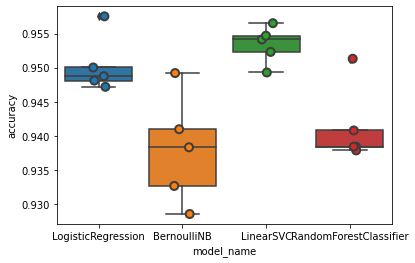

In [0]:
#Box plot is plotted for all the 4 models
sns.boxplot(x='model_name', y='accuracy', data=cv_df)

#jitters are plotted
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
#Disply the graph
plt.show()

##### CompVis Class

Cross validation is performed with 5 fold and a box plot is plotted to find the most accurate model.

In [0]:
#CompVis
models = [
    LogisticRegression(),
    BernoulliNB(),
    LinearSVC(),
    RandomForestClassifier()
]
#setting the fold value for the cross validation
CV = 5
cv_df1 = pd.DataFrame(index=range(CV * len(models)))
entries = []
#finding the accuracies for each model 
for model in models:
     model_name = model.__class__.__name__
     accuracies = cross_val_score(model, x_train, y2_train, scoring='accuracy', cv=CV)
     for fold_idx, accuracy in enumerate(accuracies):
          entries.append((model_name, fold_idx, accuracy))
        
# Accuracies for each model is populated in a dataframe
cv_df1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df1


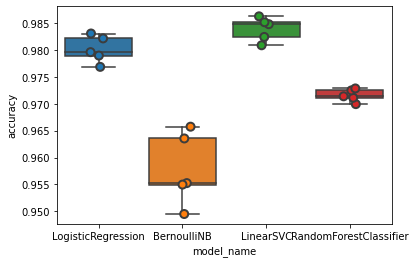

In [0]:
#Boxplot is plotted for the accuracies
sns.boxplot(x='model_name', y='accuracy', data=cv_df1)
#Jitters are added to the boxplot
sns.stripplot(x='model_name', y='accuracy', data=cv_df1, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

#display the graph
plt.show()

##### Math Class

Cross validation is performed with 5 fold and a box plot is plotted to find the most accurate model.

In [0]:
#Math
models = [
    LogisticRegression(),
    BernoulliNB(),
    LinearSVC(),
    RandomForestClassifier()
]
#setting the fold value for the cross validation
CV = 5
cv_df2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
#Calculate the accuracies 
for model in models:
     model_name = model.__class__.__name__
     accuracies = cross_val_score(model, x_train, y3_train, scoring='accuracy', cv=CV)
     for fold_idx, accuracy in enumerate(accuracies):
          entries.append((model_name, fold_idx, accuracy))
#populate the dataframe with the accuracies for the model
cv_df2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df2


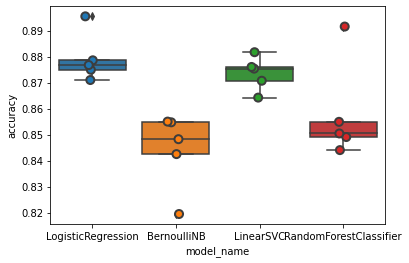

In [0]:
#Box plot is plotted for the accuracies of the model
sns.boxplot(x='model_name', y='accuracy', data=cv_df2)

#Jitters are being fitted to the boxplot
sns.stripplot(x='model_name', y='accuracy', data=cv_df2, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
#Disply the graph 
plt.show()

### Model Building:
Based on the all the other techniques we could infer that the Linear SVC is the most accurate model with less distortion, therefore it is used to build the text classifiers for all the three classes.

- Converting the test dataframes into a list and transforming the test data

In [0]:
#converting the dataframe columns to list
testInfo = df_test.InfoTheory.tolist() 
testComp = df_test.CompVis.tolist()
testMath = df_test.Math.tolist() 
testAbstract = df_test.Abstract.tolist()
# Using the same vectorizer to transform the test set
x_test=vectorizer.transform(testAbstract)
y1_test=np.asarray(testInfo)
y2_test=np.asarray(testComp)
y3_test=np.asarray(testMath)

#Setting the model as Linear SVC
clf=LinearSVC()

#### Math class model:

Model is built for the math class and the predicted value is being stored

In [ ]:
#Building the model and fiting train with test values
    model_name = clf.__class__.__name__
    clf.fit(x_train, y3_train)
    # Do the prediction
    y3_predict=clf.predict(x_test)
  

#### Info Theory class model:

Model is built for the infotheory class and the predicted value is being stored

In [0]:
#building the model and fiting train with test values
model_name = clf.__class__.__name__
clf.fit(x_train, y1_train)
    # Do the prediction
y1_predict=clf.predict(x_test)


#### CompVis class model:

Model is built for the compvis class and the predicted value is being stored

In [ ]:
#Building and fitting the train and test  values
model_name = clf.__class__.__name__
clf.fit(x_train, y2_train)
    # Do the prediction
y2_predict=clf.predict(x_test)

#### Results:

The final confusion matrix is being calculated and displayed

In [0]:
#display the confusion matrix for 
print("Confusion Matrix for InfoTheory :\n",confusion_matrix(y1_test,y1_predict))
print("Confusion Matrix for CompVis :\n",confusion_matrix(y2_test,y2_predict))
print("Confusion Matrix for Math :\n",confusion_matrix(y3_test,y3_predict))

Confusion Matrix for InfoTheory :
 [[15777   285]
 [  665  2951]]
Confusion Matrix for CompVis :
 [[17426   100]
 [  503  1649]]
Confusion Matrix for Math :
 [[12731  1017]
 [ 1482  4448]]


## Part 2: Topic Modelling

Based on the content being gathered from news sites, containing the term "Monash University", or at tagged with the label "Monash University" by an external annotator. Topic models are to be built on the content to analyse the range of topics present in the articles regarding Monash University.


In [24]:
#installing the required packages
#!pip3 install pyLDAvis

#Importing the required packages and libraries
from gensim.models.coherencemodel import CoherenceModel
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases
from gensim.corpora import Dictionary
from nltk.tokenize import RegexpTokenizer
from gensim.models import LdaModel
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pprint import pprint
import nltk
nltk.download('stopwords')
import string
nltk.download('wordnet')
import pandas as pd
import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [26]:
#Read the data 
df = pd.read_csv('Monash_crawled.csv',delimiter=',')

In [27]:
#Checking for any null or empty lines in the dataframe
df.isna().sum()

uri      0
url      0
date     0
title    0
body     0
dtype: int64

In [28]:
#converting the body and title column from the dataframe into a list
docs = df['body'].tolist()
title = df['title'].tolist()
#display the length and title of the documents
print(len(docs))
print(len(title))

366
366


In [29]:
#concatenating the stopwords and punctuation in a list to preprocess 
final_stopwords=list(string.punctuation)+list(stopwords.words('english'))
print(len(final_stopwords))

211


#### Preprocessing of Data
The data was checked for null values and then processed with the regular text processing techniques. In this step, the pre-processing techniques like as tokenisation, lemmatisation, stop words, punctuations,bigrams and trigrams are removed. 

The text is converted to corpus -> bag of words using the Dictionary and then the corpus is used to build the LDA model.The final result of unique tokens and number of documents is taken


In [30]:
def processing(docs):
# Preprocessing  the documents.  
#Split the documents into tokens.
  tokenizer = RegexpTokenizer(r'\w+')
  #Tokenising
  for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()
      # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Tokenize into words.
  # Remove numbers, but not words that contain numbers.
  docs = [[token for token in doc if not token.isnumeric()] for doc in docs]
  #Removing all the stopwords and punctuations
  docs = [[token for token in doc if token not in final_stopwords] for doc in docs]

  # Remove words that are only one character.
  docs = [[token for token in doc if len(token) > 1] for doc in docs]
  #Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  #
  docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  #Adding bigrams
  bigram = Phrases(docs, min_count=20)
 
  for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
  #Create a dictionary representation of the documents.
  dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 85% of the documents.
  dictionary.filter_extremes(no_below=20, no_above=0.85)

# Bag-of-words representation of the documents.
  corpus = [dictionary.doc2bow(doc) for doc in docs]

#return the documents,corpus and dictionary
  return(docs, corpus, dictionary)

In [31]:
#Assigning the processed tokens, corpus and dictionaries.
process_body=processing(docs)
process_docs=process_body[0]
process_corpus=process_body[1]
process_dic=process_body[2]



2020-05-08 14:53:44,468 : INFO : collecting all words and their counts
2020-05-08 14:53:44,470 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-05-08 14:53:45,049 : INFO : collected 124892 word types from a corpus of 192463 words (unigram + bigrams) and 366 sentences
2020-05-08 14:53:45,049 : INFO : using 124892 counts as vocab in Phrases<0 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2020-05-08 14:53:46,378 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-08 14:53:46,939 : INFO : built Dictionary(15396 unique tokens: ['1am', '42c', 'aavoid', 'able', 'according']...) from 366 documents (total 203755 corpus positions)
2020-05-08 14:53:46,997 : INFO : discarding 14077 tokens: [('1am', 4), ('42c', 1), ('aavoid', 1), ('acertainly', 1), ('actas', 1), ('acting', 16), ('advise', 7), ('aextremely', 1), ('air_pollution', 8), ('aitas', 12)]...
2020-05-08 14:53:47,002 : INFO : keeping 1319 tokens which were in no less than 20 and no

In [32]:
#display the number of unique tokens and the documents
print('Number of unique tokens: %d' % len(process_dic))
print('Number of documents: %d' % len(process_corpus))

Number of unique tokens: 1319
Number of documents: 366


### LDA Model 
The Latent Dirichlet Allocation model is developed by using the gensim library. The parameters needed for the model are setup such as Number of Topics from the corpus,chunk_size,iterations count and its passes.
Once the model is built, using the perplexity and coherence is used to determine the num_topics to be used. The model is iterated for topic numbers from 2 to 15 and coherence is calculated for each of the model.Two LDA models are created based on the top 2 coherence score denoting NUM_TOPIC values.


In [33]:
# Training the LDA model.

def model1(topic,dictionary,corpus):
# Setting the training parameters.
  NUM_TOPICS = topic
  chunksize = 2000
  passes = 20
  iterations = 400
  eval_every = None  

# Making an index to dictionary of wrds.
  temp = dictionary[0] 
#
  id2word = dictionary.id2token
#model is being built 
  model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
  )
#returning the model
  return(model)



 #### To find the coherence of different number of topics
 The parameters used are dictionary : Gensim dictionary,corpus : Gensim corpus,texts : List of input texts,limit : Max num of topics
 which in turn  returns a List of LDA topic models and its Coherence values corresponding to the LDA model with respective number of topics
 

In [22]:
#referred from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    coherence_values = []
    #A LDA model is called and coherence is calculated
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    #the coherence values are being returned
    return coherence_values

In [23]:
#The coherence value is calculated for 15 number of topics and incremented by 1

limit=15;
start=2;
step=1;

#coherence values are stored 
body_coherence_values=compute_coherence_values(process_dic,process_corpus,process_docs,limit,start,step)

2020-05-08 10:34:08,855 : INFO : using symmetric alpha at 0.5
2020-05-08 10:34:08,858 : INFO : using symmetric eta at 0.5
2020-05-08 10:34:08,860 : INFO : using serial LDA version on this node
2020-05-08 10:34:08,862 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 366 documents, updating model once every 366 documents, evaluating perplexity every 366 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-08 10:34:08,863 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-05-08 10:34:09,574 : INFO : -7.570 per-word bound, 190.0 perplexity estimate based on a held-out corpus of 366 documents with 136440 words
2020-05-08 10:34:09,575 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-08 10:34:10,001 : INFO : topic #0 (0.500): 0.016*"australia" + 0.013*"january" + 0.012*"february" + 0.012*"coronavirus" + 0.011*"people" + 0.009*"aus

2020-05-08 10:34:46,326 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-05-08 10:34:47,031 : INFO : -7.713 per-word bound, 209.8 perplexity estimate based on a held-out corpus of 366 documents with 136440 words
2020-05-08 10:34:47,032 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-08 10:34:47,401 : INFO : topic #0 (0.200): 0.011*"people" + 0.009*"virus" + 0.009*"university" + 0.008*"coronavirus" + 0.008*"health" + 0.007*"january" + 0.007*"also" + 0.006*"could" + 0.006*"australia" + 0.006*"china"
2020-05-08 10:34:47,401 : INFO : topic #1 (0.200): 0.015*"february" + 0.013*"people" + 0.012*"australia" + 0.010*"china" + 0.009*"australian" + 0.009*"january" + 0.008*"case" + 0.007*"virus" + 0.007*"coronavirus" + 0.006*"health"
2020-05-08 10:34:47,401 : INFO : topic #2 (0.200): 0.013*"australia" + 0.011*"people" + 0.010*"february" + 0.009*"january" + 0.009*"coronavirus" + 0.008*"australian" + 0.

2020-05-08 10:35:20,848 : INFO : 5 batches submitted to accumulate stats from 320 documents (145110 virtual)
2020-05-08 10:35:20,866 : INFO : 6 batches submitted to accumulate stats from 384 documents (163861 virtual)
2020-05-08 10:35:22,149 : INFO : 7 accumulators retrieved from output queue
2020-05-08 10:35:22,168 : INFO : accumulated word occurrence stats for 163918 virtual documents
2020-05-08 10:35:22,367 : INFO : using symmetric alpha at 0.125
2020-05-08 10:35:22,367 : INFO : using symmetric eta at 0.125
2020-05-08 10:35:22,367 : INFO : using serial LDA version on this node
2020-05-08 10:35:22,383 : INFO : running online (single-pass) LDA training, 8 topics, 1 passes over the supplied corpus of 366 documents, updating model once every 366 documents, evaluating perplexity every 366 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-08 10:35:22,384 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations

2020-05-08 10:35:48,131 : INFO : topic #2 (0.100): 0.013*"australia" + 0.011*"university" + 0.010*"january" + 0.010*"australian" + 0.009*"coronavirus" + 0.009*"february" + 0.008*"people" + 0.006*"china" + 0.006*"two" + 0.006*"virus"
2020-05-08 10:35:48,132 : INFO : topic diff=0.721162, rho=1.000000
2020-05-08 10:35:48,136 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-05-08 10:35:57,643 : INFO : 1 batches submitted to accumulate stats from 64 documents (20166 virtual)
2020-05-08 10:35:57,664 : INFO : 2 batches submitted to accumulate stats from 128 documents (54220 virtual)
2020-05-08 10:35:57,674 : INFO : 3 batches submitted to accumulate stats from 192 documents (86400 virtual)
2020-05-08 10:35:57,684 : INFO : 4 batches submitted to accumulate stats from 256 documents (111464 virtual)
2020-05-08 10:35:57,707 : INFO : 5 batches submitted to accumulate stats from 320 documents (145110 virtual)
2020-05-08 

2020-05-08 10:36:24,764 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-08 10:36:25,207 : INFO : topic #12 (0.077): 0.016*"february" + 0.012*"january" + 0.012*"people" + 0.011*"china" + 0.011*"virus" + 0.010*"australia" + 0.010*"coronavirus" + 0.009*"case" + 0.008*"ship" + 0.007*"two"
2020-05-08 10:36:25,209 : INFO : topic #5 (0.077): 0.017*"australia" + 0.014*"january" + 0.014*"february" + 0.012*"coronavirus" + 0.012*"china" + 0.010*"virus" + 0.010*"people" + 0.008*"australian" + 0.008*"case" + 0.007*"wuhan"
2020-05-08 10:36:25,210 : INFO : topic #8 (0.077): 0.018*"australia" + 0.014*"february" + 0.013*"january" + 0.013*"people" + 0.010*"coronavirus" + 0.008*"case" + 0.008*"university" + 0.008*"also" + 0.007*"australian" + 0.007*"could"
2020-05-08 10:36:25,211 : INFO : topic #11 (0.077): 0.019*"february" + 0.015*"january" + 0.012*"coronavirus" + 0.010*"australian" + 0.009*"people" + 0.009*"china" + 0.008*"case" + 0.007*"virus" + 0.007*"australia" + 0.007*"health"
2020-05-08 10

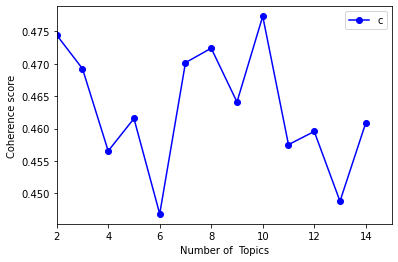

In [47]:
# A graph is plotted with Number of topics versus coherence score
x=range(2,15)
plt.plot(x,body_coherence_values,'bo-')
plt.xlim(2,15)
plt.xlabel("Number of  Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### 2 LDA models are built for Number of topics as <i>2 and 10</i> 

In [37]:
model_1=model1(2,process_dic,process_corpus)
model_2=model1(10,process_dic,process_corpus)

2020-05-08 14:57:07,564 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2020-05-08 14:57:07,568 : INFO : using serial LDA version on this node
2020-05-08 14:57:07,569 : INFO : running online (multi-pass) LDA training, 2 topics, 20 passes over the supplied corpus of 366 documents, updating model once every 366 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-05-08 14:57:07,570 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-08 14:57:12,259 : INFO : optimized alpha [0.7413664, 0.6214323]
2020-05-08 14:57:12,259 : INFO : topic #0 (0.741): 0.014*"february" + 0.013*"january" + 0.013*"people" + 0.012*"australia" + 0.012*"coronavirus" + 0.010*"virus" + 0.009*"china" + 0.008*"health" + 0.007*"australian" + 0.007*"case"
2020-05-08 14:57:12,259 : INFO : topic #1 (0.621): 0.015*"australia" + 0.012*"coronavirus" + 0.009*"australian" + 0.009*"people" + 0.009*"february" + 0.008*"january" + 0.007*"case" + 0.006*"china" +

2020-05-08 14:57:21,428 : INFO : topic diff=0.016497, rho=0.277350
2020-05-08 14:57:21,431 : INFO : PROGRESS: pass 12, at document #366/366
2020-05-08 14:57:22,045 : INFO : optimized alpha [0.087715834, 0.07058468]
2020-05-08 14:57:22,049 : INFO : topic #0 (0.088): 0.018*"february" + 0.017*"coronavirus" + 0.016*"january" + 0.015*"australia" + 0.013*"people" + 0.012*"virus" + 0.012*"china" + 0.009*"case" + 0.009*"australian" + 0.008*"health"
2020-05-08 14:57:22,050 : INFO : topic #1 (0.071): 0.010*"australia" + 0.010*"university" + 0.008*"also" + 0.007*"area" + 0.007*"people" + 0.007*"year" + 0.007*"say" + 0.006*"one" + 0.006*"fire" + 0.006*"could"
2020-05-08 14:57:22,051 : INFO : topic diff=0.014257, rho=0.267261
2020-05-08 14:57:22,053 : INFO : PROGRESS: pass 13, at document #366/366
2020-05-08 14:57:22,596 : INFO : optimized alpha [0.08891782, 0.07133421]
2020-05-08 14:57:22,596 : INFO : topic #0 (0.089): 0.018*"february" + 0.017*"coronavirus" + 0.016*"january" + 0.016*"australia" + 

2020-05-08 14:57:33,007 : INFO : topic #6 (0.090): 0.028*"february" + 0.022*"january" + 0.019*"coronavirus" + 0.018*"australia" + 0.011*"people" + 0.009*"australian" + 0.009*"south" + 0.008*"case" + 0.008*"mask" + 0.008*"virus"
2020-05-08 14:57:33,008 : INFO : topic diff=0.375959, rho=0.577350
2020-05-08 14:57:33,010 : INFO : PROGRESS: pass 2, at document #366/366
2020-05-08 14:57:34,423 : INFO : optimized alpha [0.054589055, 0.041964903, 0.048688017, 0.051896587, 0.036699317, 0.048183568, 0.08457738, 0.050615884, 0.06203643, 0.05547158]
2020-05-08 14:57:34,432 : INFO : topic #4 (0.037): 0.021*"china" + 0.016*"coronavirus" + 0.013*"case" + 0.010*"death" + 0.010*"chinese" + 0.008*"wuhan" + 0.008*"people" + 0.008*"virus" + 0.007*"number" + 0.007*"year"
2020-05-08 14:57:34,434 : INFO : topic #1 (0.042): 0.014*"university" + 0.014*"say" + 0.011*"one" + 0.010*"time" + 0.010*"also" + 0.010*"could" + 0.010*"research" + 0.009*"like" + 0.008*"dr" + 0.008*"work"
2020-05-08 14:57:34,435 : INFO : 

2020-05-08 14:57:39,995 : INFO : topic #9 (0.050): 0.016*"people" + 0.013*"wuhan" + 0.013*"coronavirus" + 0.013*"china" + 0.012*"australia" + 0.012*"january" + 0.012*"virus" + 0.011*"flight" + 0.010*"passenger" + 0.010*"health"
2020-05-08 14:57:39,999 : INFO : topic #6 (0.079): 0.039*"february" + 0.029*"january" + 0.020*"coronavirus" + 0.019*"australia" + 0.011*"people" + 0.011*"south" + 0.011*"mask" + 0.010*"australian" + 0.008*"case" + 0.008*"virus"
2020-05-08 14:57:40,000 : INFO : topic diff=0.235364, rho=0.333333
2020-05-08 14:57:40,007 : INFO : PROGRESS: pass 8, at document #366/366
2020-05-08 14:57:40,980 : INFO : optimized alpha [0.039482366, 0.044859607, 0.04169744, 0.033065226, 0.025114592, 0.04505451, 0.07895058, 0.046720963, 0.0490349, 0.050597105]
2020-05-08 14:57:40,986 : INFO : topic #4 (0.025): 0.031*"china" + 0.021*"case" + 0.021*"coronavirus" + 0.014*"death" + 0.013*"chinese" + 0.012*"wuhan" + 0.011*"number" + 0.010*"reuters" + 0.010*"sars" + 0.010*"virus"
2020-05-08 1

2020-05-08 14:57:45,772 : INFO : topic #3 (0.029): 0.035*"patient" + 0.020*"study" + 0.016*"mass" + 0.014*"disease" + 0.013*"test" + 0.013*"also" + 0.013*"would" + 0.013*"level" + 0.013*"per" + 0.012*"per_cent"
2020-05-08 14:57:45,775 : INFO : topic #1 (0.048): 0.016*"university" + 0.015*"say" + 0.011*"time" + 0.011*"one" + 0.010*"also" + 0.010*"could" + 0.009*"like" + 0.008*"research" + 0.008*"work" + 0.008*"year"
2020-05-08 14:57:45,777 : INFO : topic #9 (0.052): 0.016*"people" + 0.013*"wuhan" + 0.013*"coronavirus" + 0.013*"china" + 0.013*"australia" + 0.012*"january" + 0.012*"flight" + 0.012*"virus" + 0.011*"health" + 0.010*"passenger"
2020-05-08 14:57:45,779 : INFO : topic #6 (0.080): 0.042*"february" + 0.031*"january" + 0.020*"coronavirus" + 0.019*"australia" + 0.011*"mask" + 0.011*"south" + 0.011*"people" + 0.011*"australian" + 0.009*"february_february" + 0.008*"january_january"
2020-05-08 14:57:45,781 : INFO : topic diff=0.148486, rho=0.258199
2020-05-08 14:57:45,784 : INFO : PR

2020-05-08 14:57:51,365 : INFO : optimized alpha [0.034433868, 0.053296216, 0.0399433, 0.027556054, 0.020819357, 0.04337394, 0.08397366, 0.049836874, 0.04674617, 0.054048736]
2020-05-08 14:57:51,370 : INFO : topic #4 (0.021): 0.033*"china" + 0.023*"case" + 0.021*"coronavirus" + 0.015*"death" + 0.014*"chinese" + 0.013*"wuhan" + 0.011*"number" + 0.010*"reuters" + 0.010*"sars" + 0.009*"infection"
2020-05-08 14:57:51,372 : INFO : topic #3 (0.028): 0.037*"patient" + 0.022*"study" + 0.017*"mass" + 0.015*"per" + 0.015*"disease" + 0.014*"per_cent" + 0.014*"cent" + 0.014*"level" + 0.014*"test" + 0.013*"also"
2020-05-08 14:57:51,374 : INFO : topic #1 (0.053): 0.017*"university" + 0.015*"say" + 0.012*"time" + 0.011*"one" + 0.010*"also" + 0.010*"could" + 0.009*"year" + 0.008*"work" + 0.008*"like" + 0.008*"research"
2020-05-08 14:57:51,376 : INFO : topic #9 (0.054): 0.016*"people" + 0.014*"china" + 0.014*"coronavirus" + 0.014*"wuhan" + 0.013*"australia" + 0.012*"january" + 0.012*"flight" + 0.011*"v

#### Topic Analysis
The two LDA models analysis is built for the BODY column. Based on the coherence plot, top two Num_topics is chosen to build the model.Based on the plot we could say the top two coherence score are for number of topics 2 and 10.The perplexity(measure to find the better model-lower perplexity is better) for two models are -6.57 and -6.45.The coherence score(Higher value gives better results) for the two models is 0.46 and 0.48.
An LDA model is built for 2 and 10 topics to be found out from the context


In [39]:
model_1.print_topics()

2020-05-08 14:59:48,295 : INFO : topic #0 (0.097): 0.018*"coronavirus" + 0.018*"february" + 0.016*"january" + 0.016*"australia" + 0.013*"people" + 0.013*"virus" + 0.012*"china" + 0.009*"case" + 0.009*"australian" + 0.008*"health"
2020-05-08 14:59:48,297 : INFO : topic #1 (0.077): 0.010*"university" + 0.010*"australia" + 0.008*"also" + 0.007*"area" + 0.007*"people" + 0.007*"year" + 0.007*"say" + 0.006*"one" + 0.006*"fire" + 0.006*"could"


[(0,
  '0.018*"coronavirus" + 0.018*"february" + 0.016*"january" + 0.016*"australia" + 0.013*"people" + 0.013*"virus" + 0.012*"china" + 0.009*"case" + 0.009*"australian" + 0.008*"health"'),
 (1,
  '0.010*"university" + 0.010*"australia" + 0.008*"also" + 0.007*"area" + 0.007*"people" + 0.007*"year" + 0.007*"say" + 0.006*"one" + 0.006*"fire" + 0.006*"could"')]

###### Topic Interpretation 
- Topic -1: The topic is based on corona-virus outbreak affecting people in china in January and February
- Topic -2: This article is about the bush fires affecting people and universities

In [40]:
model_2.print_topics()

2020-05-08 14:59:57,467 : INFO : topic #0 (0.034): 0.038*"virus" + 0.025*"people" + 0.022*"coronavirus" + 0.018*"case" + 0.013*"symptom" + 0.013*"spread" + 0.012*"china" + 0.010*"outbreak" + 0.009*"health" + 0.009*"wuhan"
2020-05-08 14:59:57,467 : INFO : topic #1 (0.053): 0.017*"university" + 0.015*"say" + 0.012*"time" + 0.011*"one" + 0.010*"also" + 0.010*"could" + 0.009*"year" + 0.008*"work" + 0.008*"like" + 0.008*"research"
2020-05-08 14:59:57,472 : INFO : topic #2 (0.040): 0.032*"fire" + 0.024*"australia" + 0.015*"year" + 0.013*"bushfires" + 0.013*"south" + 0.010*"climate" + 0.010*"people" + 0.008*"million" + 0.008*"country" + 0.008*"bushfire"
2020-05-08 14:59:57,474 : INFO : topic #3 (0.028): 0.037*"patient" + 0.022*"study" + 0.017*"mass" + 0.015*"per" + 0.015*"disease" + 0.014*"per_cent" + 0.014*"cent" + 0.014*"level" + 0.014*"test" + 0.013*"also"
2020-05-08 14:59:57,476 : INFO : topic #4 (0.021): 0.033*"china" + 0.023*"case" + 0.021*"coronavirus" + 0.015*"death" + 0.014*"chinese"

[(0,
  '0.038*"virus" + 0.025*"people" + 0.022*"coronavirus" + 0.018*"case" + 0.013*"symptom" + 0.013*"spread" + 0.012*"china" + 0.010*"outbreak" + 0.009*"health" + 0.009*"wuhan"'),
 (1,
  '0.017*"university" + 0.015*"say" + 0.012*"time" + 0.011*"one" + 0.010*"also" + 0.010*"could" + 0.009*"year" + 0.008*"work" + 0.008*"like" + 0.008*"research"'),
 (2,
  '0.032*"fire" + 0.024*"australia" + 0.015*"year" + 0.013*"bushfires" + 0.013*"south" + 0.010*"climate" + 0.010*"people" + 0.008*"million" + 0.008*"country" + 0.008*"bushfire"'),
 (3,
  '0.037*"patient" + 0.022*"study" + 0.017*"mass" + 0.015*"per" + 0.015*"disease" + 0.014*"per_cent" + 0.014*"cent" + 0.014*"level" + 0.014*"test" + 0.013*"also"'),
 (4,
  '0.033*"china" + 0.023*"case" + 0.021*"coronavirus" + 0.015*"death" + 0.014*"chinese" + 0.013*"wuhan" + 0.011*"number" + 0.010*"reuters" + 0.010*"sars" + 0.009*"infection"'),
 (5,
  '0.028*"area" + 0.014*"cell" + 0.013*"australian" + 0.012*"australia" + 0.012*"smoke" + 0.012*"air" + 0.01

###### Topic interpretation

- Topic -1: Corona virus outbreak in china
- Topic -2: Article about time required in study
- Topic -3:  This topic tells about bush fire affecting cimatic change
- Topic -4: This is related to disease percent on patients
- Topic -5: Corona virus in comparison with SARS
- Topic -6: Amount of smoke in australia due to bush fires
- Topic -7 : Sales of face masks in australia during january and february
- Topic -8: Effect of lockdown on women and students in different sectors
- Topic -9: Article about travel ban due to corona virus
- Topic -10: Passengers health in january who travelled to australia from china


##### Perplexity & coherence for both the models

Lesser perplexity and higher coherence values tends in giving a better model 
(https://cfss.uchicago.edu/notes/topic-modeling/)

In [41]:
#Referred from https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.log_perplexity.html
# Compute Perplexity
print('\nPerplexity for model 1: ', model_1.log_perplexity(process_corpus))
print('\nPerplexity for model 2: ', model_2.log_perplexity(process_corpus))  

2020-05-08 15:00:12,337 : INFO : -6.574 per-word bound, 95.3 perplexity estimate based on a held-out corpus of 366 documents with 136440 words



Perplexity for model 1:  -6.574336694012011


2020-05-08 15:00:13,842 : INFO : -6.454 per-word bound, 87.7 perplexity estimate based on a held-out corpus of 366 documents with 136440 words



Perplexity for model 2:  -6.453714072322285


In [42]:
#Referred from - https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model_1, texts=process_docs, dictionary=process_dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for model 1: ', coherence_lda)

2020-05-08 15:00:13,887 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-05-08 15:00:33,004 : INFO : 1 batches submitted to accumulate stats from 64 documents (20166 virtual)
2020-05-08 15:00:33,039 : INFO : 2 batches submitted to accumulate stats from 128 documents (54220 virtual)
2020-05-08 15:00:33,062 : INFO : 3 batches submitted to accumulate stats from 192 documents (86400 virtual)
2020-05-08 15:00:33,078 : INFO : 4 batches submitted to accumulate stats from 256 documents (111464 virtual)
2020-05-08 15:00:33,101 : INFO : 5 batches submitted to accumulate stats from 320 documents (145110 virtual)
2020-05-08 15:00:33,115 : INFO : 6 batches submitted to accumulate stats from 384 documents (163861 virtual)
2020-05-08 15:00:35,341 : INFO : 7 accumulators retrieved from output queue
2020-05-08 15:00:35,376 : INFO : accumulated word occurrence stats for 163918 virtual documents



Coherence Score for model 1:  0.46169046744338527


In [43]:
#Referred from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model_2, texts=process_docs, dictionary=process_dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for model 2: ', coherence_lda)

2020-05-08 15:00:35,549 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-05-08 15:00:53,558 : INFO : 1 batches submitted to accumulate stats from 64 documents (20166 virtual)
2020-05-08 15:00:53,588 : INFO : 2 batches submitted to accumulate stats from 128 documents (54220 virtual)
2020-05-08 15:00:53,614 : INFO : 3 batches submitted to accumulate stats from 192 documents (86400 virtual)
2020-05-08 15:00:53,647 : INFO : 4 batches submitted to accumulate stats from 256 documents (111464 virtual)
2020-05-08 15:00:53,682 : INFO : 5 batches submitted to accumulate stats from 320 documents (145110 virtual)
2020-05-08 15:00:53,699 : INFO : 6 batches submitted to accumulate stats from 384 documents (163861 virtual)
2020-05-08 15:00:58,552 : INFO : 7 accumulators retrieved from output queue
2020-05-08 15:00:58,601 : INFO : accumulated word occurrence stats for 163918 virtual documents



Coherence Score for model 2:  0.48057741777834995


##### Top Topic words of  model 1 (Num-topics=2)

In [44]:
top_topics = model_1.top_topics(process_corpus) 

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / 3
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#Display the top_topic words
pprint(top_topics)

Average topic coherence: -0.4158.
[([(0.017692477, 'coronavirus'),
   (0.01766787, 'february'),
   (0.016268795, 'january'),
   (0.0155811785, 'australia'),
   (0.013353015, 'people'),
   (0.012521321, 'virus'),
   (0.011600798, 'china'),
   (0.009433183, 'case'),
   (0.009263308, 'australian'),
   (0.008097337, 'health'),
   (0.007546989, 'wuhan'),
   (0.0065679317, 'chinese'),
   (0.0065531796, 'south'),
   (0.005301967, 'flight'),
   (0.0052828398, 'student'),
   (0.0052586757, 'week'),
   (0.0052302578, 'confirmed'),
   (0.0052273506, 'two'),
   (0.0051445467, 'outbreak'),
   (0.0048611593, 'mask')],
  -0.5001039400640237),
 ([(0.010294124, 'university'),
   (0.0100177, 'australia'),
   (0.007908823, 'also'),
   (0.007486366, 'area'),
   (0.0072398772, 'people'),
   (0.0072251493, 'year'),
   (0.0068471124, 'say'),
   (0.006488074, 'one'),
   (0.0062925257, 'fire'),
   (0.0061849467, 'could'),
   (0.0060765096, 'time'),
   (0.006021183, 'australian'),
   (0.005939159, 'study'),
   

##### Top Topic words of  model 2 (Num-topics=10)

In [45]:
top_topics = model_2.top_topics(process_corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / 5
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#display the top topic words
pprint(top_topics)

Average topic coherence: -1.7484.
[([(0.043798488, 'february'),
   (0.031658143, 'january'),
   (0.019270081, 'australia'),
   (0.019175407, 'coronavirus'),
   (0.011542912, 'mask'),
   (0.0112758055, 'south'),
   (0.011087607, 'australian'),
   (0.011007126, 'people'),
   (0.008965964, 'february_february'),
   (0.008470614, 'january_january'),
   (0.008199743, 'virus'),
   (0.007370031, 'case'),
   (0.00728053, 'face'),
   (0.0070090895, 'aedt'),
   (0.0069617718, 'pictured'),
   (0.0068755625, 'japan'),
   (0.006738485, 'queensland'),
   (0.006141372, 'western'),
   (0.0059351046, 'one'),
   (0.0059303762, 'told')],
  -0.39175192083901167),
 ([(0.01567512, 'people'),
   (0.013654446, 'china'),
   (0.0135522885, 'coronavirus'),
   (0.013541957, 'wuhan'),
   (0.013204231, 'australia'),
   (0.01226075, 'january'),
   (0.011728818, 'flight'),
   (0.011455796, 'virus'),
   (0.010970281, 'health'),
   (0.009840985, 'passenger'),
   (0.009349359, 'hospital'),
   (0.008793986, 'confirmed'),


### INFERENCES 
All the topics are not related to Monash University. The topics are easily comprehensible and it is easily relatable to the article based on the top topic words. These topic words which has university or monash suggests us that those topics are either directly or indirectly to the Monash University.Based on our 2 models, Monash University is related to Bushfire,climate studies and coronavirus’travel ban affecting the students.


In [56]:
#Plot a graph to display the intertopic distance and the most relevant terms present in the topics
lda_display = pyLDAvis.gensim.prepare(model_1, process_corpus, process_dic, sort_topics=True)
pyLDAvis.display(lda_display)

In [57]:
#Plot a graph to display the intertopic distance and the most relevant terms present in the topics
lda_display = pyLDAvis.gensim.prepare(model_2, process_corpus, process_dic, sort_topics=True)
pyLDAvis.display(lda_display)

### Document Mapping

The dominant topics and topic percentage and the keywords for each title is being calculated and stored in a dataframe which is inturn used to find the **URL** links of the topics 


In [48]:
#referred from - https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#create a function to find the dominant topic, its % and the keywords used.
def format_topics_sentences(ldamodel, corpus, texts):
    # Initialise the output
    sent_topics_df = pd.DataFrame()

    # Get main topic in every topic document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each topic document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                #Finding the keywords
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    #setting the columns for the dataframe
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Adding the text to the end of the dataframe
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    #returning the dataframe
    return(sent_topics_df)



In [49]:
#Finding the dominant topic for model 1
df_topic_sents_keywords = format_topics_sentences(ldamodel=model_1, corpus=process_corpus, texts=process_docs)
# Formatting the dataframe for displaying
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#display a snippet 
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9767,"university, australia, also, area, people, yea...","[canberra, experienced, worst, air, quality, r..."
1,1,1.0,0.8514,"university, australia, also, area, people, yea...","[dawn, broke, blackened, australian, landscape..."
2,2,1.0,0.9993,"university, australia, also, area, people, yea...","[baby, brain, body, grow, lot, first, six, mon..."
3,3,1.0,0.9998,"university, australia, also, area, people, yea...","[living, polluted, city, may, make, bone, weak..."
4,4,1.0,0.9992,"university, australia, also, area, people, yea...","[researcher, developed, new, battery, claim, p..."
5,5,1.0,0.9995,"university, australia, also, area, people, yea...","[scientist, discovered, specific, protein, tri..."
6,6,1.0,0.9987,"university, australia, also, area, people, yea...","[washington, jan, xinhua, international, team,..."
7,7,1.0,0.8395,"university, australia, also, area, people, yea...","[published, aedt, january, updated, aedt, janu..."
8,8,1.0,0.9126,"university, australia, also, area, people, yea...","[firefighter, celebrating, reprieve, week, dev..."
9,9,1.0,0.9988,"university, australia, also, area, people, yea...","[washington, urdupoint, pakistan, point, news,..."


In [50]:
#Finding the dominant topic for model 2
df_topic_sents_keywords2 = format_topics_sentences(ldamodel=model_2, corpus=process_corpus, texts=process_docs)
# Formatting the dataframe for displaying 
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#display a snippet
df_dominant_topic2.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.4085,"area, cell, australian, australia, smoke, air,...","[canberra, experienced, worst, air, quality, r..."
1,1,2.0,0.7010,"fire, australia, year, bushfires, south, clima...","[dawn, broke, blackened, australian, landscape..."
2,2,1.0,0.8275,"university, say, time, one, also, could, year,...","[baby, brain, body, grow, lot, first, six, mon..."
3,3,1.0,0.4375,"university, say, time, one, also, could, year,...","[living, polluted, city, may, make, bone, weak..."
4,4,1.0,0.8222,"university, say, time, one, also, could, year,...","[researcher, developed, new, battery, claim, p..."
5,5,1.0,0.4541,"university, say, time, one, also, could, year,...","[scientist, discovered, specific, protein, tri..."
6,6,5.0,0.4186,"area, cell, australian, australia, smoke, air,...","[washington, jan, xinhua, international, team,..."
7,7,2.0,0.8134,"fire, australia, year, bushfires, south, clima...","[published, aedt, january, updated, aedt, janu..."
8,8,2.0,0.9988,"fire, australia, year, bushfires, south, clima...","[firefighter, celebrating, reprieve, week, dev..."
9,9,5.0,0.4046,"area, cell, australian, australia, smoke, air,...","[washington, urdupoint, pakistan, point, news,..."


In [51]:
#Display the dominant topic for model 1
Counter(df_dominant_topic['Dominant_Topic'])

Counter({1.0: 143, 0.0: 223})

In [52]:
#Display the dominant topic for model 2
Counter(df_dominant_topic2['Dominant_Topic'])

Counter({5.0: 26,
         2.0: 31,
         1.0: 52,
         0.0: 21,
         6.0: 85,
         7.0: 35,
         3.0: 12,
         9.0: 46,
         8.0: 49,
         4.0: 9})

In [54]:
#Finding the url corresponding to the dominant topic
model1_url = df.iloc[223]['url']
print(model1_url)

https://www.dailymail.co.uk/news/article-8009293/Coronavirus-crisis-Australian-expatriates-China-disease-changed-lives.html


In [55]:
#finding the url corresponding to the dominant topic
model2_url = df.iloc[26]['url']
print(model2_url)

http://global.chinadaily.com.cn/a/202001/08/WS5e153594a310cf3e35583232.html


#### OUTPUT :
Based on the dominant topics we have considered two topics as examples one for topic 5 and topic 9, to support our inferences.
In Topic 1, that relates to the work-rights and job, article from the news https://www.dailymail.co.uk/news/article-8009293/Coronavirus-crisis-Australian-expatriates-China-disease-changed-lives.html dated 16/02/2020 gives a view on the employment sector of Australia being affected by Coronavirus, where the article quotes
Related to topic 3 on study made by Australian students on climate change  , as quoted in article http://global.chinadaily.com.cn/a/202001/08/WS5e153594a310cf3e35583232.html dated 08/01/2020 states the damage caused by the bushfires and also its adverse future climatic effects


## References
#### RNN
<li>Tutorial materials
<li>https://discuss.pytorch.org/t/what-is-manual-seed/5939/10
<li>https://www.analyticsvidhya.com/blog/2020/01/first-text-classification-in-pytorch/
<li>https://discuss.pytorch.org/t/type-object-tabulardataset-has-no-attribute/58590
<li> https://torchtext.readthedocs.io/en/latest/data.html
<li>https://github.com/pytorch/text/issues/430</li>

#### Statistical modelling :
<li>Tutorial materials
<li>https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
<li>https://www.geeksforgeeks.org/confusion-matrix-machine-learning/</li>

#### Topic modelling:
<li>Tutorial materials
<li>https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
<li>https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
<li>https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
<li>https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
<li>http://qpleple.com/perplexity-to-evaluate-topic-models/
<li>https://stats.stackexchange.com/questions/18167/how-to-calculate-perplexity-of-a-holdout-with-latent-dirichlet-allocation
<li>https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
<li>https://cfss.uchicago.edu/notes/topic-modeling/
<li>https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.log_perplexity.html
